In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error

from sklearn.inspection import permutation_importance

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

seed = 42

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1].to_frame()
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1].to_frame()

In [10]:
ss = StandardScaler().set_output(transform='pandas')
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)

In [12]:
en = Pipeline([
    ('poly',PolynomialFeatures(degree=1)),
    ('pca',PCA(n_components=13)),
    ('ss',StandardScaler()),
    ('en',ElasticNet(
        tol=0.001,
        max_iter=10000,
        l1_ratio=0.1,
        alpha=0.1
    ))
])

en_cols = ['OverallQual', 'GrLivArea', 'Fireplaces', 'Neighborhood', 'KitchenQual',
       'GarageCars', '1stFlrSF', 'GarageArea', 'ExterQual', 'TotalBsmtSF',
       'OverallCond', 'TotRmsAbvGrd', 'CentralAir', 'MSZoning', 'YearRemodAdd',
       'BsmtFinSF1', 'MasVnrArea', 'HeatingQC', 'BsmtQual', 'FullBath',
       'WoodDeckSF', 'GarageFinish', 'LotFrontage', '2ndFlrSF', 'HalfBath',
       'LotShape', 'BsmtExposure', 'LotArea', 'Foundation', 'YearBuilt',
       'MasVnrType', 'SaleCondition', 'BedroomAbvGr', 'GarageType',
       'OpenPorchSF', 'BsmtFinType1', 'GarageYrBlt', 'MSSubClass',
       'Condition1', 'SaleType', 'BsmtUnfSF', 'Exterior1st']

en.fit(X_train[en_cols], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('pca', PCA(n_components=13)), ('ss', StandardScaler()),
                ('en',
                 ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000,
                            tol=0.001))])

In [14]:
svr_lin = SVR(
    C=0.01,
    kernel='linear'
    )
svr_lin.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.01, kernel='linear')

In [16]:
svr_poly = SVR(
    C=0.1,
    kernel='poly',
    degree=1,
    gamma=0.2,
    coef0=-0.25
    )
svr_poly.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, coef0=-0.25, degree=1, gamma=0.2, kernel='poly')

In [18]:
svr_rbf = SVR(
    C=0.3,
    gamma=0.009,
    kernel='rbf'
    )
rbf_col = X_train.columns.drop('Exterior2nd')
svr_rbf.fit(X_train[rbf_col],y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.3, gamma=0.009)

In [20]:
svr_sig = SVR(
    C=0.8,
    gamma=0.01,
    kernel='sigmoid',
    coef0=-0.8
    )
sig_col = ['CentralAir', 'GrLivArea', 'Fireplaces', 'OverallCond', 'TotRmsAbvGrd',
       'OverallQual', 'BsmtFinSF1', 'MasVnrArea', '1stFlrSF', 'TotalBsmtSF',
       'BsmtExposure', '2ndFlrSF', 'GarageCars', 'FullBath', 'GarageArea',
       'BedroomAbvGr', 'LotFrontage', 'HalfBath', 'ExterQual', 'Neighborhood',
       'YearBuilt', 'MasVnrType', 'BsmtQual', 'KitchenQual', 'OpenPorchSF',
       'WoodDeckSF', 'Condition1', 'BsmtFinType1', 'SaleType', 'LotArea',
       'Foundation', 'SaleCondition', 'GarageFinish', 'BsmtUnfSF',
       'FireplaceQu', 'YearRemodAdd']
svr_sig.fit(X_train[sig_col],y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.8, coef0=-0.8, gamma=0.01, kernel='sigmoid')

In [22]:
knn = KNeighborsRegressor(
    weights= 'uniform',
    n_neighbors= 6,
    algorithm= 'ball_tree',
    n_jobs=-1
    )

knn_col = ['CentralAir', 'GrLivArea', 'Fireplaces', 'OverallCond', 'TotRmsAbvGrd',
       'OverallQual', 'BsmtFinSF1', 'MasVnrArea', '1stFlrSF', 'TotalBsmtSF',
       'BsmtExposure', '2ndFlrSF', 'GarageCars', 'FullBath', 'GarageArea',
       'BedroomAbvGr', 'LotFrontage', 'HalfBath', 'ExterQual', 'Neighborhood',
       'YearBuilt', 'MasVnrType', 'BsmtQual', 'KitchenQual', 'OpenPorchSF',
       'WoodDeckSF', 'Condition1', 'BsmtFinType1', 'SaleType', 'LotArea',
       'Foundation', 'SaleCondition', 'GarageFinish', 'BsmtUnfSF',
       'FireplaceQu', 'YearRemodAdd']

knn.fit(X_train[knn_col],y_train)

KNeighborsRegressor(algorithm='ball_tree', n_jobs=-1, n_neighbors=6)

In [24]:
dt = DecisionTreeRegressor(
  min_samples_split= 15,
  min_samples_leaf= 14,
  max_features= None,
  max_depth= 6,
  criterion= 'friedman_mse',
  ccp_alpha= 0.0001,
  random_state=seed
    )
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0001, criterion='friedman_mse', max_depth=6,
                      min_samples_leaf=14, min_samples_split=15,
                      random_state=42)

In [26]:
rf = RandomForestRegressor(
    n_estimators=60,
    min_samples_split=12,
    min_samples_leaf=20,
    max_depth=11,
    random_state=seed,
    criterion= 'squared_error',
    ccp_alpha=0.0003
    )
rf.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(ccp_alpha=0.0003, max_depth=11, min_samples_leaf=20,
                      min_samples_split=12, n_estimators=60, random_state=42)

In [28]:
xgbr = XGBRegressor(
        reg_lambda=22,
        reg_alpha=5,
        random_state=seed,
        n_estimators=30,
        min_child_weight=9,
        max_leaves=4,
        max_depth=10,
        learning_rate=0.19,
        gamma=0.7,
        colsample_bytree=0.8
    )
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.7, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.19, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=4, min_child_weight=9, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=30,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
def score_compare(models,scores,X,y):

    import pandas as pd
    
    if not isinstance(models,dict):
        raise Exception('Prove the model and model name in a dictionary format')
    if not isinstance(scores,list):
        scores = [scores]


    model_names = list(models.keys())
    score_names = [score.__name__ for score in scores]
    
    output = pd.DataFrame(index=model_names,columns=score_names)
    
    for m in range(len(models)):
        for s in range(len(scores)):
            output.loc[model_names[m],score_names[s]] = scores[s](y,models[model_names[m]].predict(X[models[model_names[m]].feature_names_in_]))
    return output
    

In [32]:
models = {'Elastic Net':en,
          'SVC Linear Kernel':svr_lin,
          'SVC Polynomial Kernel':svr_poly,
          'SVC RBF Kernel':svr_rbf,
          'SVC Sigmoid Kernel':svr_sig,
          'K-Nearest Neighbor':knn,
          'Decision Tree':dt,
          'Random Forest':rf,
          'XG Boost':xgbr
         }

In [34]:
score_compare(models,[r2_score, mean_absolute_error, mean_squared_error],X_test,y_test)

,r2_score,mean_absolute_error,mean_squared_error
Elastic Net,0.874568,0.263038,0.140411
SVC Linear Kernel,0.917955,0.208407,0.091842
SVC Polynomial Kernel,0.917846,0.208278,0.091965
SVC RBF Kernel,0.893562,0.222506,0.119148
SVC Sigmoid Kernel,0.91373,0.209643,0.096572
K-Nearest Neighbor,0.862051,0.283227,0.154422
Decision Tree,0.808834,0.330763,0.213994
Random Forest,0.85347,0.275549,0.164028
XG Boost,0.866364,0.269899,0.149594


In [38]:
cv_scores = {}
for name,model in models.items():
    scores = cross_val_score(model, X_test, y_test.values.flatten(), cv=5, scoring="r2")
    cv_scores[name] = scores

f_stat, pval = f_oneway(
    cv_scores['Elastic Net'],
    cv_scores['SVC Linear Kernel'],
    cv_scores['SVC Polynomial Kernel'],
    cv_scores['SVC RBF Kernel'],
    cv_scores['SVC Sigmoid Kernel'], 
    cv_scores['K-Nearest Neighbor'],
    cv_scores['Decision Tree'],
    cv_scores['Random Forest'],
    cv_scores['XG Boost']
)
print('ANOVA f-statistics ',f_stat,' p-value ',pval)

ANOVA f-statistics  9.863744168389681  p-value  3.915147597745668e-07


In [40]:
scores = np.concatenate([cv_scores['Elastic Net'],
                         cv_scores['SVC Linear Kernel'],
                         cv_scores['SVC Polynomial Kernel'],
                         cv_scores['SVC RBF Kernel'],
                         cv_scores['SVC Sigmoid Kernel'], 
                         cv_scores['K-Nearest Neighbor'],
                         cv_scores['Decision Tree'],
                         cv_scores['Random Forest'],
                         cv_scores['XG Boost']
                        ])
models = ['Elastic Net']*5 + ['SVC Linear Kernel']*5 + ['SVC Polynomial Kernel']*5 + ['SVC RBF Kernel']*5 + ['SVC Sigmoid Kernel']*5 +['K-Nearest Neighbor']*5+['Decision Tree']*5 + ['Random Forest']*5 +['XG Boost']*5
tukey = pairwise_tukeyhsd(scores, models, alpha=0.05)
print(tukey.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
        Decision Tree           Elastic Net   0.1453 0.0002  0.0541  0.2366   True
        Decision Tree    K-Nearest Neighbor   0.0669 0.3044 -0.0243  0.1582  False
        Decision Tree         Random Forest   0.0372 0.9103  -0.054  0.1284  False
        Decision Tree     SVC Linear Kernel   0.1639    0.0  0.0727  0.2551   True
        Decision Tree SVC Polynomial Kernel   0.1663    0.0  0.0751  0.2575   True
        Decision Tree        SVC RBF Kernel   0.0986 0.0259  0.0073  0.1898   True
        Decision Tree    SVC Sigmoid Kernel   0.1655    0.0  0.0743  0.2567   True
        Decision Tree              XG Boost   0.0802 0.1225  -0.011  0.1714  False
          Elastic Net    K-Nearest Neighbor  -0.0784 0.1407 -0.1696  0.0128  False
    

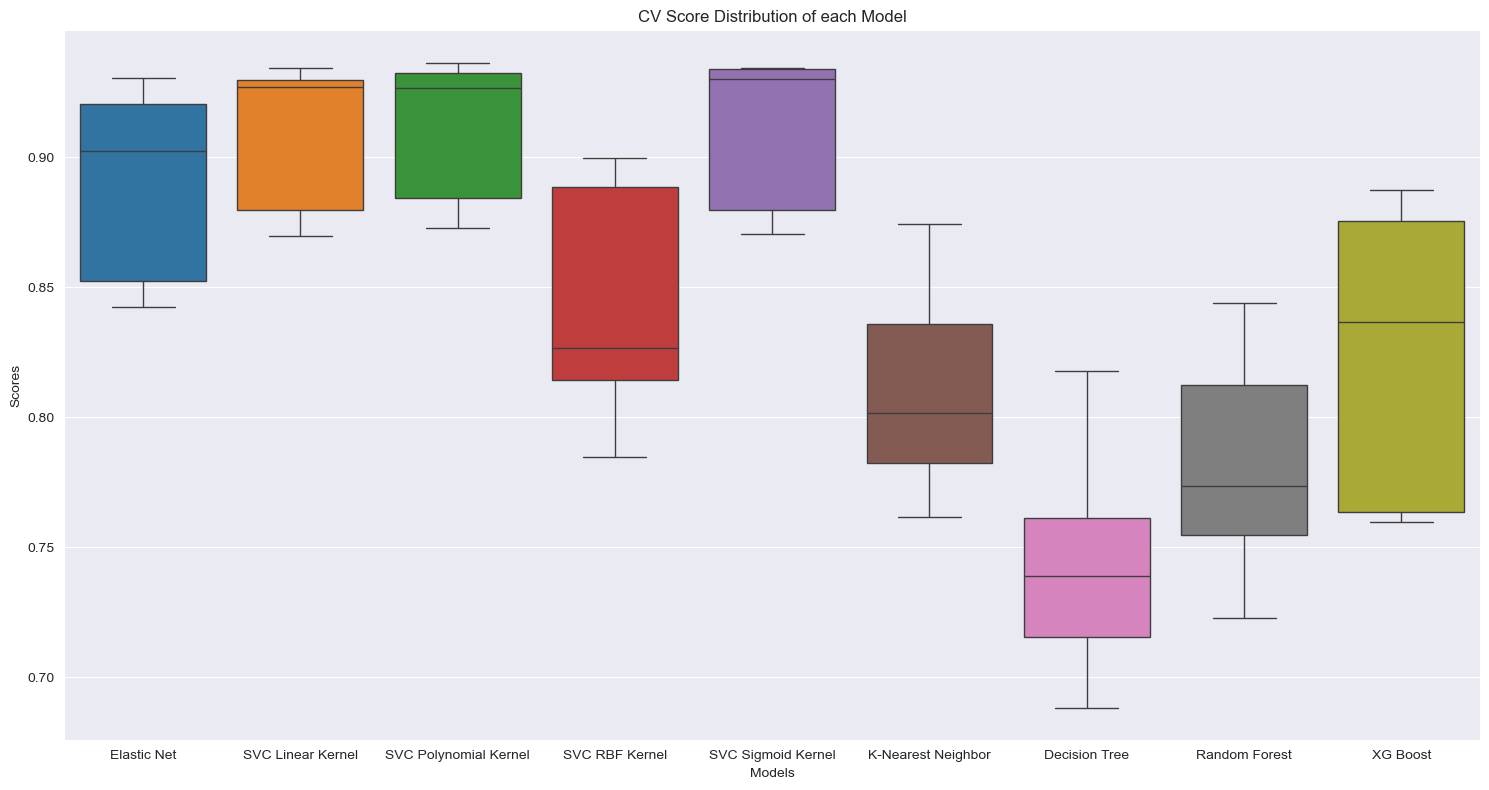

In [58]:
plt.figure(figsize=(15,8))
box = sns.boxplot(x=models,y=scores,hue=models)
box.set_ylabel('Scores')
box.set_xlabel('Models')
box.set_title('CV Score Distribution of each Model')
plt.tight_layout()
plt.show()

SVC sigmoid Kernel or polynomial kernel or linear kernel are the best performing models